<a href="https://colab.research.google.com/github/alt-plusF4/Financial-Payment-Fraud-Detection/blob/main/Financial_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Load the data
df = pd.read_csv('Fraud.csv')


In [17]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
899841,42,CASH_OUT,72546.29,C2139724808,560282.00,487735.71,C1028811303,1316390.15,1388936.44,0.0,0.0
899842,42,TRANSFER,1331404.01,C1072152161,487735.71,0.00,C839403720,2431565.23,3885907.95,0.0,0.0
899843,42,TRANSFER,346219.76,C265961220,0.00,0.00,C1527319618,349261.19,695480.95,0.0,0.0
899844,42,TRANSFER,133776.69,C639323350,0.00,0.00,C1113032088,1513890.56,1647667.25,0.0,0.0


In [18]:
# Check for missing values
df.isnull().sum()

# Drop unnecessary columns
df = df.drop(['nameOrig', 'nameDest'], axis=1)

# Convert categorical variables to numerical variables
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] = scaler.fit_transform(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])


In [23]:
df = df.dropna()

In [24]:
from sklearn.model_selection import train_test_split

# Separate the target variable
y = df['isFraud']
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(10,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [26]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=32)


Epoch 1/30
17997/17997 [==============================] - 47s 3ms/step - loss: 0.0044 - accuracy: 0.9995 - val_loss: 0.0035 - val_accuracy: 0.9995
Epoch 2/30
17997/17997 [==============================] - 41s 2ms/step - loss: 0.0027 - accuracy: 0.9996 - val_loss: 0.0028 - val_accuracy: 0.9995
Epoch 3/30
17997/17997 [==============================] - 46s 3ms/step - loss: 0.0025 - accuracy: 0.9996 - val_loss: 0.0028 - val_accuracy: 0.9995
Epoch 4/30
17997/17997 [==============================] - 43s 2ms/step - loss: 0.0025 - accuracy: 0.9996 - val_loss: 0.0028 - val_accuracy: 0.9995
Epoch 5/30
17997/17997 [==============================] - 41s 2ms/step - loss: 0.0024 - accuracy: 0.9996 - val_loss: 0.0026 - val_accuracy: 0.9996
Epoch 6/30
17997/17997 [==============================] - 46s 3ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.0024 - val_accuracy: 0.9996
Epoch 7/30
17997/17997 [==============================] - 41s 2ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0

In [35]:
accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f%%' % (accuracy[1]*100))

5625/5625 [==============================] - 11s 2ms/step - loss: 0.0020 - accuracy: 0.9997
Accuracy: 99.97%


In [46]:
# Predict on test data
y_pred = np.round(model.predict(X_test))

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

5625/5625 [==============================] - 8s 1ms/step
[[179868      3]
 [    57     41]]


<Axes: >

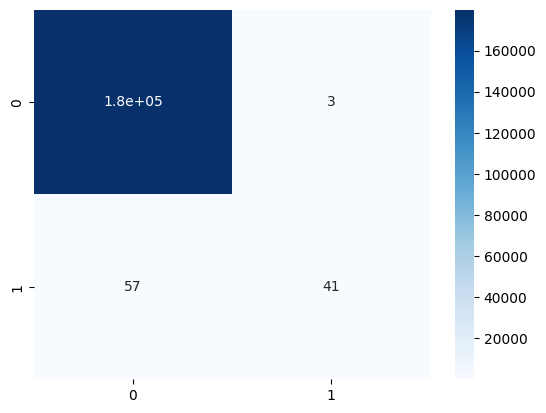

In [47]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues')